# BoW in Keras

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

https://medium.com/@pavan.11.1987/embedding-all-things-with-starspace-and-keras-1df46e4db8f0

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


---

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

---



In [18]:
%%capture requirements
!pip install tensorflow
!pip install livelossplot

In [2]:
import tensorflow as tf
print(tf.__version__)

2021-09-27 15:22:14.665577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-27 15:22:14.665625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.6.0


## Load the Newsgroup Data from `sklearn.datasets`

In [3]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_dict_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
newsgroups_dict_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

newsgroups_raw_train = newsgroups_dict_train['data']
newsgroups_raw_test = newsgroups_dict_test['data']

y_train = newsgroups_dict_train.target
y_test = newsgroups_dict_test.target

## Generating Features with `CountVectorizer` & `HashingVectorizer`

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

FEATURE_SPACE = 10**3

vectorizer = CountVectorizer(ngram_range=(1, 2))
hash_vectorizer = HashingVectorizer(n_features=FEATURE_SPACE, ngram_range=(1, 2))

In [5]:
_ = vectorizer.fit(newsgroups_raw_train)
_ = hash_vectorizer.fit(newsgroups_raw_train, )

In [20]:
X_train = vectorizer.transform(newsgroups_raw_train)
X_text = vectorizer.transform(newsgroups_raw_test)

In [58]:
X_train_hash = hash_vectorizer.transform(newsgroups_raw_train)
X_test_hash = hash_vectorizer.transform(newsgroups_raw_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [35]:
y_train_onehot = to_categorical(newsgroups_dict_train.target)
y_test_onehot = to_categorical(newsgroups_dict_test.target)

## Log Logistics Regression in Keras

In [45]:
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.text import hashing_trick, Tokenizer, one_hot
from tensorflow.keras.utils import to_categorical

In [46]:
from tensorflow.keras import layers

In [47]:
inputs = layers.Input(shape=(FEATURE_SPACE))

In [48]:
outputs =layers.Dense(20, activation="softmax")(inputs)

In [49]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [50]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                20020     
Total params: 20,020
Trainable params: 20,020
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy())

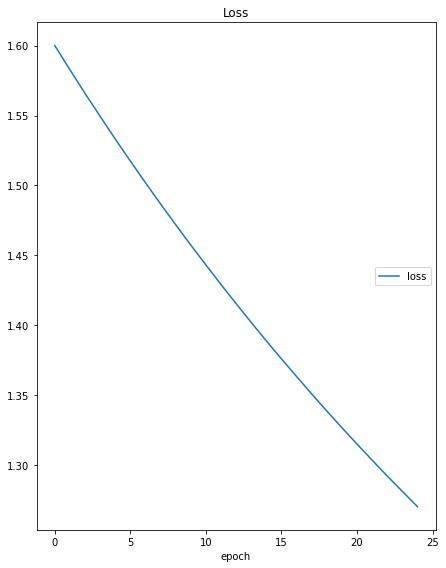

Loss
	loss             	 (min:    1.270, max:    1.600, cur:    1.270)


In [56]:
from livelossplot import PlotLossesKeras

history = model.fit(X_train_hash, y_train_onehot, batch_size=250, epochs=25, callbacks=[PlotLossesKeras()])

In [59]:
preds = model.predict(x=X_test_hash)

In [60]:
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

In [61]:
np.mean( y_pred == y_true )

0.5693043016463091